# Домашнее задание "Функции нескольких переменных".

## Уровень 0:


### Задание 1

Посчитайте частные производные функций:

1) $f(x,y)=2x^2y^3 + 1/x + y^2x + 7$

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

In [1]:
import sympy as sym

In [2]:
x = sym.Symbol('x')
y = sym.Symbol('y')

f1 = 2*(x**2)*(y**3)+(1/x)+(y**2)*x+7
df1x = sym.diff(f1, x)
df1y = sym.diff(f1, y)

f2 = (x**2)*y-sym.sin(x*y)+sym.cos(x**2)+6*y
df2x = sym.diff(f2, x)
df2y = sym.diff(f2, y)


In [3]:
print(f'Частные производные ф-и f1 по x и y соответственно:')
display(df1x)
display(df1y)

Частные производные ф-и f1 по x и y соответственно:


4*x*y**3 + y**2 - 1/x**2

6*x**2*y**2 + 2*x*y

In [4]:
print(f'Частные производные ф-и f2 по x и y соответственно:')
display(df2x)
display(df2y)

Частные производные ф-и f2 по x и y соответственно:


2*x*y - 2*x*sin(x**2) - y*cos(x*y)

x**2 - x*cos(x*y) + 6

## Уровень 1:

### Задание 2

Вычислите градиент функции:

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$

в точке $(1,2)$

In [5]:
f1 = 2*(x**2)*(y**3)+(1/x)+(y**2)*x+7
df1x = sym.diff(f1, x)
df1y = sym.diff(f1, y)
display(df1x)
display(df1y)

4*x*y**3 + y**2 - 1/x**2

6*x**2*y**2 + 2*x*y

In [6]:
gradf = [sym.diff(f1,var) for var in (x,y)]
gradf

[4*x*y**3 + y**2 - 1/x**2, 6*x**2*y**2 + 2*x*y]

In [7]:
numgradf = sym.lambdify([x,y],gradf)
numgradf

<function _lambdifygenerated(x, y)>

In [8]:
M = (1, 2)
numgradf(*M)

[35.0, 28]

In [9]:
gx = sym.diff(f1, x).evalf(subs={x:1, y:2})
gy = sym.diff(f1, y).evalf(subs={x:1, y:2})
display(gx)
display(gy)

35.0000000000000

28.0000000000000

### Задание 3

Постройте трехмерный график функции

$f(x)=x_2^2-x_1^2 x_2 + 2 x_1 x_2$

In [10]:
def f3(x1,x2):
    return x1**2-(x1**2)*x2+2*x1*x2

C:\Users\user\AppData\Local\Temp/ipykernel_11700/3600083845.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


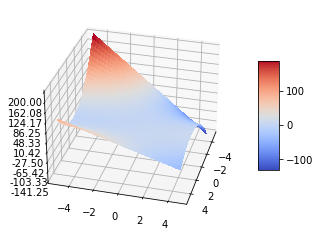

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Данные
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f3(X, Y)


# График поверхности
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Настройка оси z

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Цветовая легенда
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim = 15
ax.dist = 10
ax.elev = 30

plt.show()